It is a classification model to predict price range of mobile

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/data.csv')
data.head() #Default 5 values

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,BDIX,desc,price_range
0,842,0,2.2,0,1,No,7.0,0.6,188.0,2,...,2549,9,7,19,No,0,Yes,NaN,NaN,Medium
1,1021,1,0.5,1,0,Yes,53.0,0.7,136.0,3,...,2631,17,3,7,Yes,1,No,NaN,NaN,High
2,563,1,0.5,1,2,Yes,41.0,0.9,145.0,5,...,2603,11,2,9,Yes,1,No,NaN,NaN,High
3,615,1,2.5,0,0,No,10.0,0.8,131.0,6,...,2769,16,8,11,Yes,0,No,NaN,NaN,High
4,1821,1,1.2,0,13,Yes,44.0,0.6,141.0,2,...,1411,8,2,15,Yes,1,No,NaN,NaN,Medium


In [ ]:
data.shape

(2000, 23)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     1995 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      1994 non-null   float64
 9   n_cores        2000 non-null   int64  
 10  pc             1993 non-null   float64
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [ ]:
data['price_range'].value_counts()

,count
price_range,
Medium,500
High,500
Very High,500
Low,500


<Axes: xlabel='count', ylabel='price_range'>

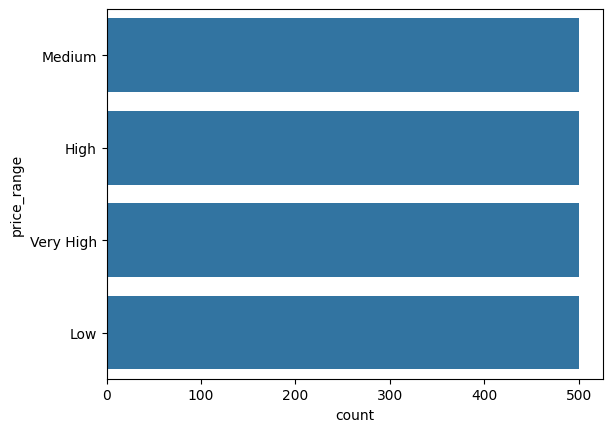

In [ ]:
sns.countplot(data['price_range'])

Data Preprocessing

Null Values

In [ ]:
data.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,5
m_dep,0
mobile_wt,6
n_cores,0


Drop Colums

In [ ]:
data = data.drop(['BDIX', 'desc'], axis = 1)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     1995 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      1994 non-null   float64
 9   n_cores        2000 non-null   int64  
 10  pc             1993 non-null   float64
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

Drop Rows

In [ ]:
data = data.dropna(axis = 0, subset = ['mobile_wt'])
data = data.dropna(axis = 0, subset = ['pc'])
data.shape
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1987 non-null   int64  
 1   blue           1987 non-null   int64  
 2   clock_speed    1987 non-null   float64
 3   dual_sim       1987 non-null   int64  
 4   fc             1987 non-null   int64  
 5   four_g         1987 non-null   object 
 6   int_memory     1982 non-null   float64
 7   m_dep          1987 non-null   float64
 8   mobile_wt      1987 non-null   float64
 9   n_cores        1987 non-null   int64  
 10  pc             1987 non-null   float64
 11  px_height      1987 non-null   int64  
 12  px_width       1987 non-null   int64  
 13  ram            1987 non-null   int64  
 14  sc_h           1987 non-null   int64  
 15  sc_w           1987 non-null   int64  
 16  talk_time      1987 non-null   int64  
 17  three_g        1987 non-null   object 
 18  touch_screen 

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,5
m_dep,0
mobile_wt,0
n_cores,0


Imputing missing values

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(data[['int_memory']])

data['int_memory'] = impute.transform(data[['int_memory']])

In [ ]:
data.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


Feature Engineering

In [ ]:
data['four_g'].unique()
data['three_g'].unique()
data['wifi'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data['price_range'].unique()

array(['Medium', 'High', 'Very High', 'Low'], dtype=object)

Encoding Categorical Values

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

data['four_g_enc'] = encode.fit_transform(data['four_g'])
data['three_g_enc'] = encode.fit_transform(data['three_g'])
data['wifi_enc'] = encode.fit_transform(data['wifi'])

print(data[['four_g', 'four_g_enc']].head(3))
print(data[['three_g', 'three_g_enc']].head(3))
print(data[['wifi', 'wifi_enc']].head(3))

  four_g  four_g_enc
0     No           0
1    Yes           1
2    Yes           1
  three_g  three_g_enc
0      No            0
1     Yes            1
2     Yes            1
  wifi  wifi_enc
0  Yes         1
1   No         0
2   No         0


Label Encoding (Using map function)

In [ ]:
data['price_range'] = data['price_range'].map({'Low':0,'Medium':1,'High':2,'Very High':3})
data.shape
print(data['price_range'].head(10))

0    1
1    2
2    2
3    2
4    1
5    1
6    3
7    0
8    0
9    0
Name: price_range, dtype: int64


In [ ]:
data = data.drop(['four_g', 'three_g','wifi' ], axis = 1)

In [ ]:
data.head()


,battery_power,blue,clock_speed,dual_sim,fc,int_memory,m_dep,mobile_wt,n_cores,pc,...,px_width,ram,sc_h,sc_w,talk_time,touch_screen,price_range,four_g_enc,three_g_enc,wifi_enc
0,842,0,2.2,0,1,7.0,0.6,188.0,2,2.0,...,756,2549,9,7,19,0,1,0,0,1
1,1021,1,0.5,1,0,53.0,0.7,136.0,3,6.0,...,1988,2631,17,3,7,1,2,1,1,0
2,563,1,0.5,1,2,41.0,0.9,145.0,5,6.0,...,1716,2603,11,2,9,1,2,1,1,0
3,615,1,2.5,0,0,10.0,0.8,131.0,6,9.0,...,1786,2769,16,8,11,0,2,0,1,0
4,1821,1,1.2,0,13,44.0,0.6,141.0,2,14.0,...,1212,1411,8,2,15,1,1,1,1,0


In [ ]:
data.shape

(1987, 21)

In [ ]:
data['price_range'].value_counts()

,count
price_range,
1,497
2,497
0,497
3,496


Feature Selection

Text(0.5, 1.0, 'Analysis of Correlations')

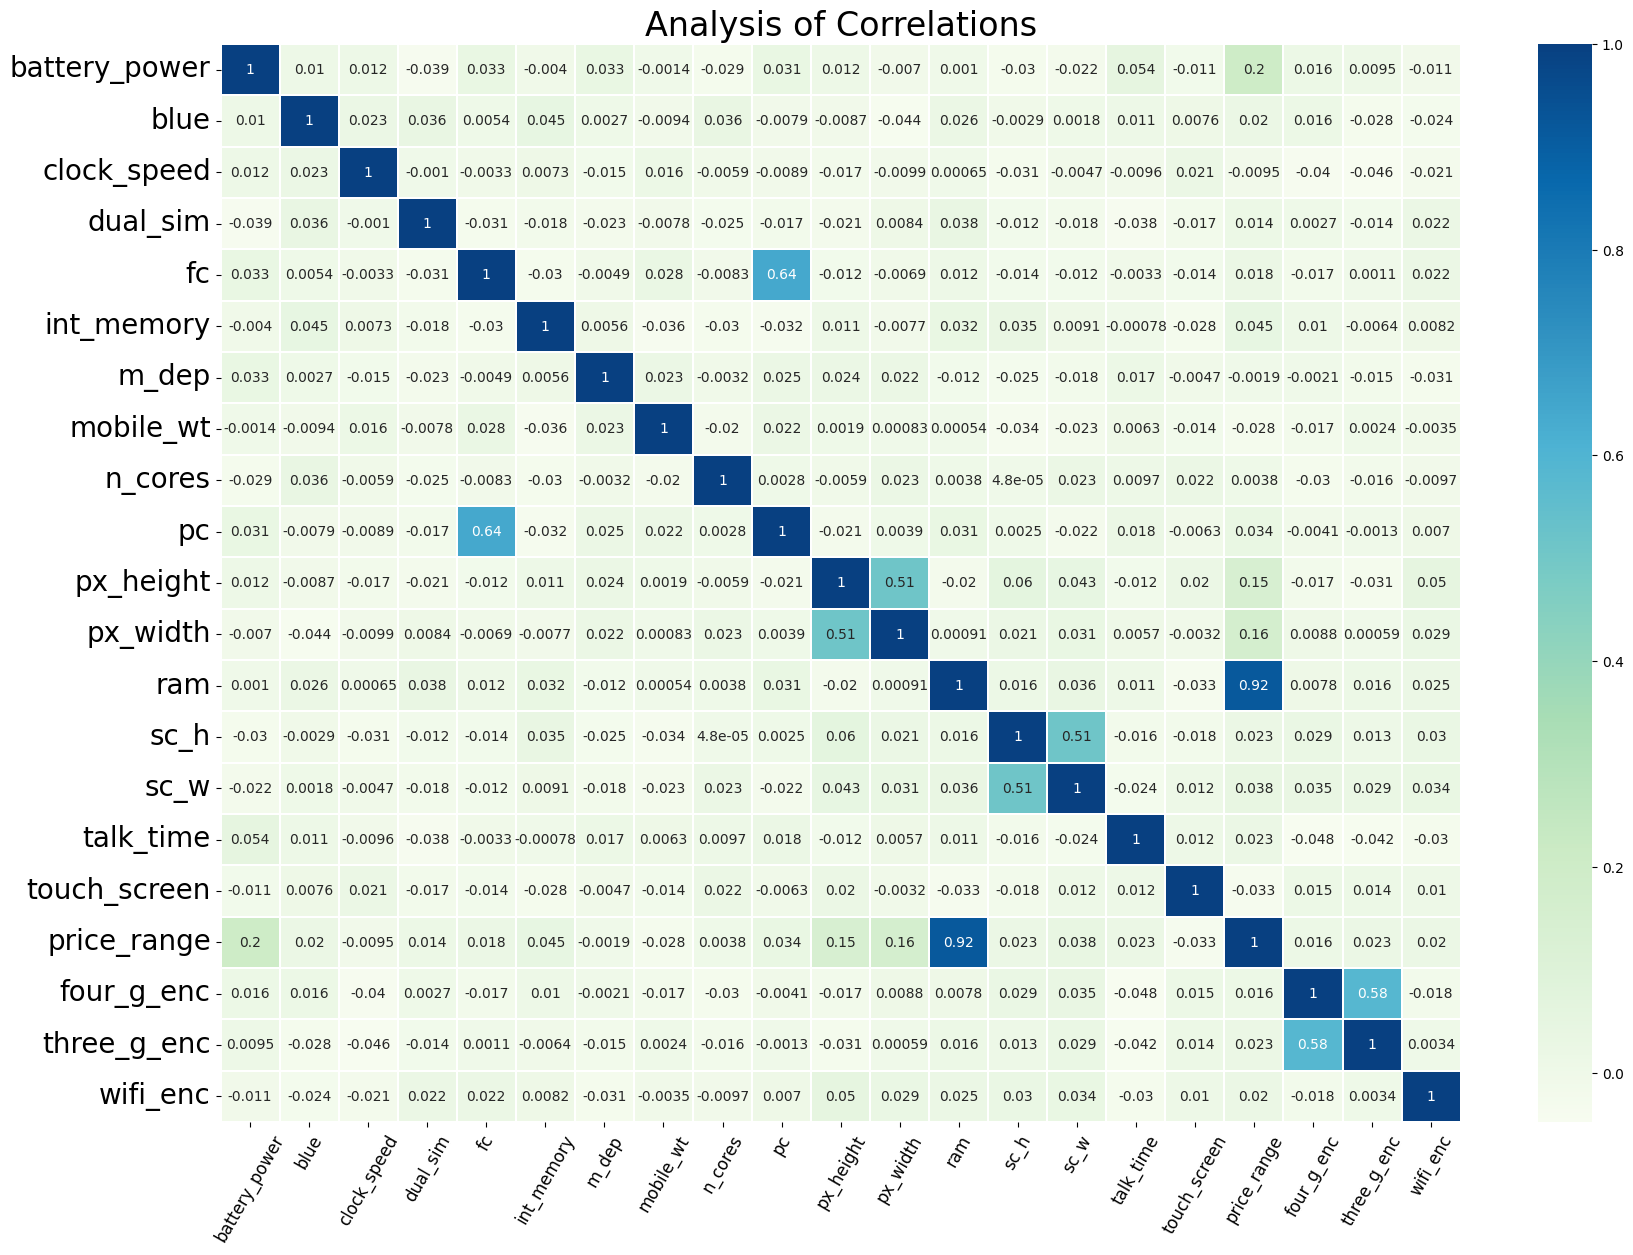

In [ ]:
sns.heatmap(data.corr(), annot = True, cmap = "GnBu", linewidths= 0.2 )
fig = plt.gcf()
fig.set_size_inches(20,14)
plt.xticks(rotation = 60, size = 12)
plt.yticks(size = 20)
plt.title('Analysis of Correlations', size = 24)

In [ ]:
print("No column where the correlation value is greater than 0.75 at least twice. So no reason to drop any column")

No column where the correlation value is greater than 0.75 at least twice. So no reason to drop any column


Text(0.5, 1.0, 'Feature Correlating with Price Range')

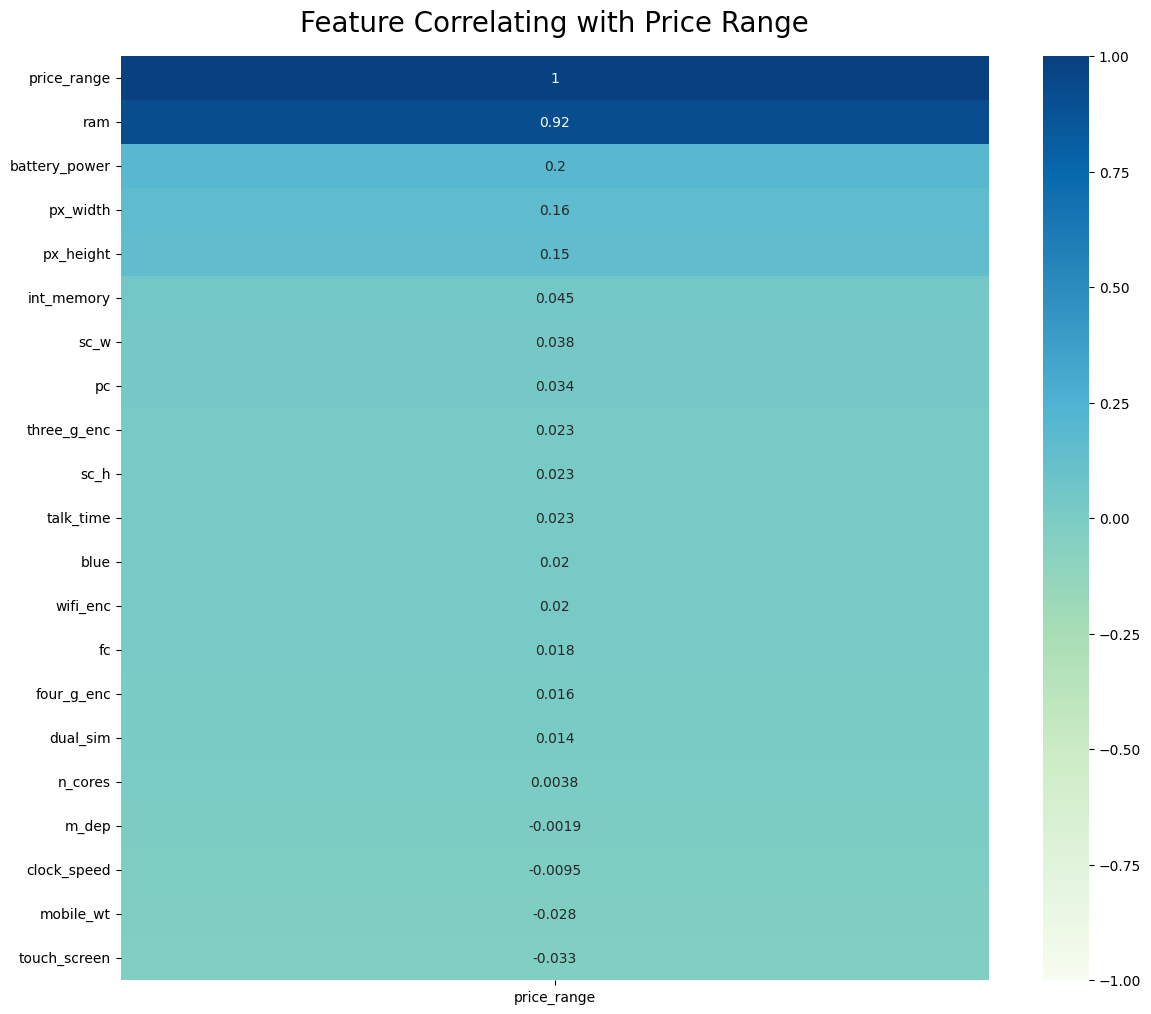

In [ ]:
plt.figure(figsize = (14, 12))
heatmap = sns.heatmap(data.corr()[['price_range']].sort_values (by = 'price_range',ascending = False),vmin = -1, vmax = 1, annot = True, cmap = 'GnBu')
heatmap.set_title('Feature Correlating with Price Range', fontdict = {'fontsize':20}, pad =18)

Text(0.5, 1.0, 'Feature Correlating with Price Range')

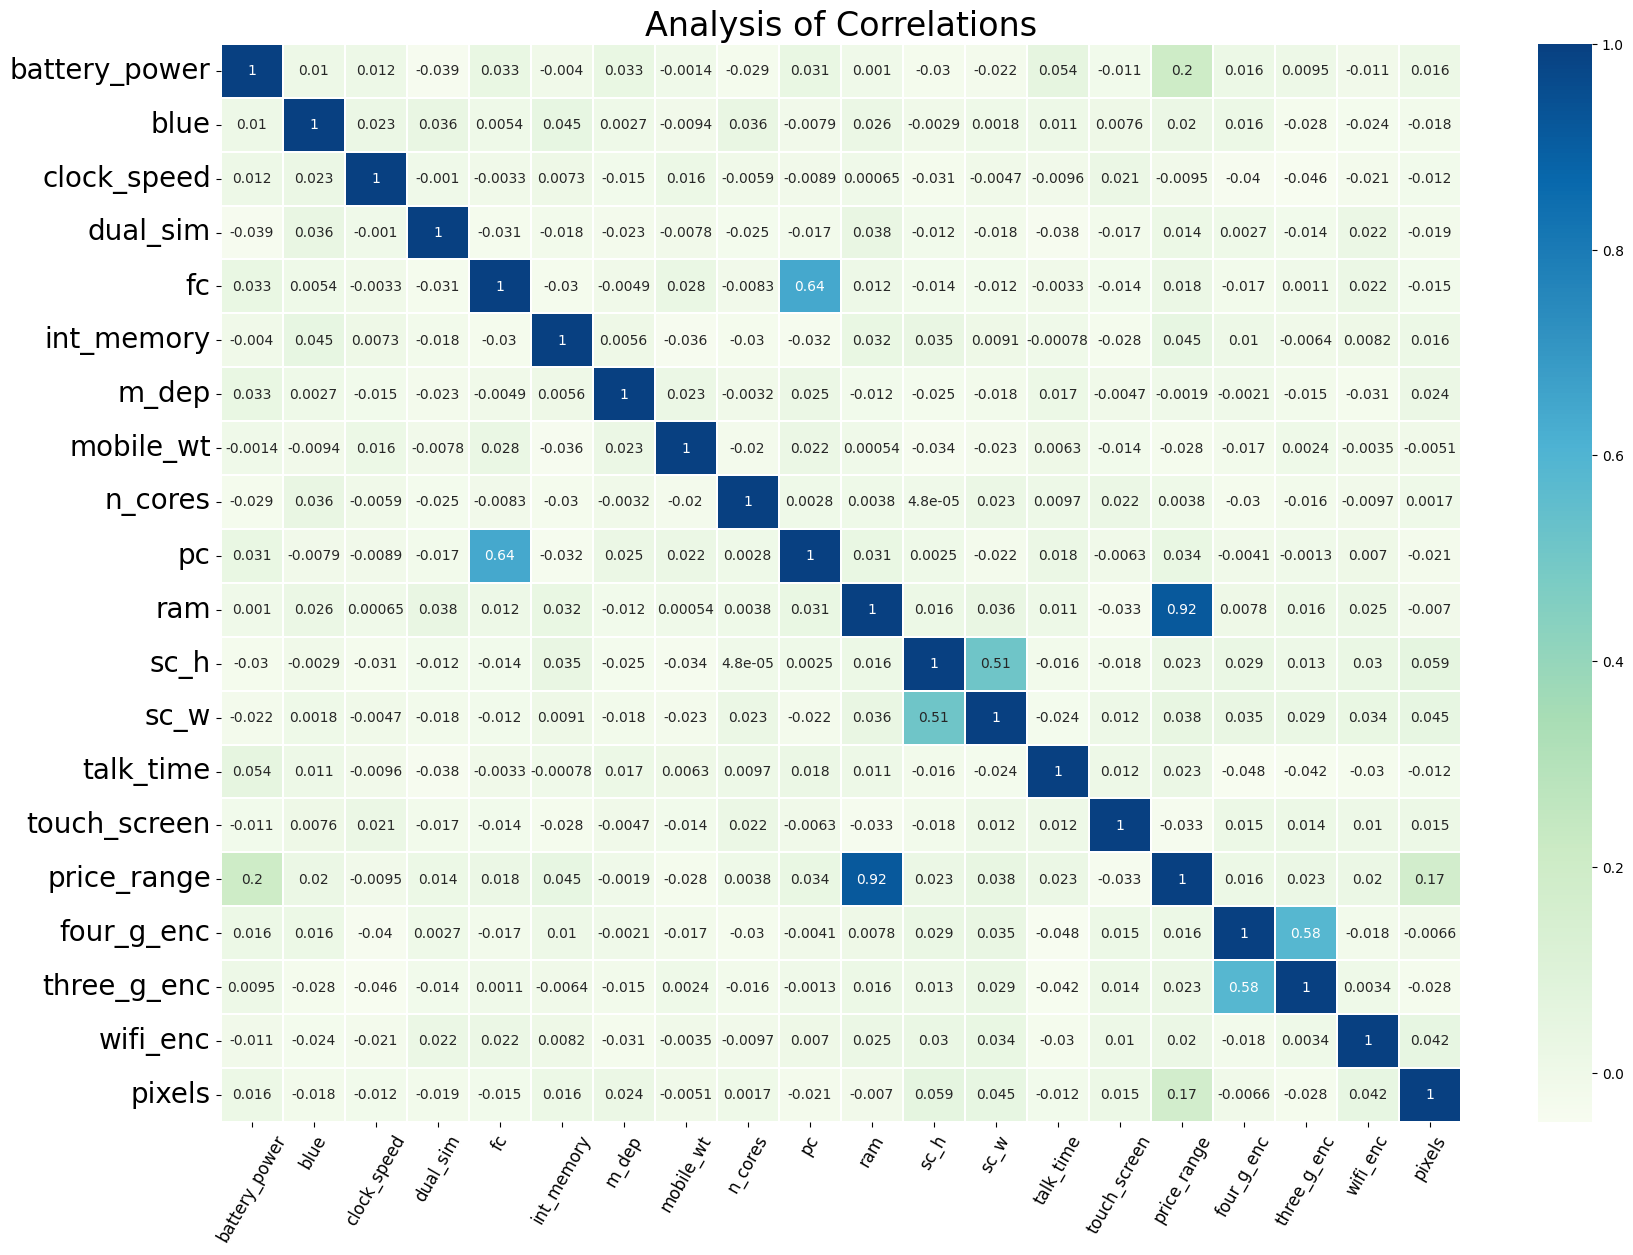

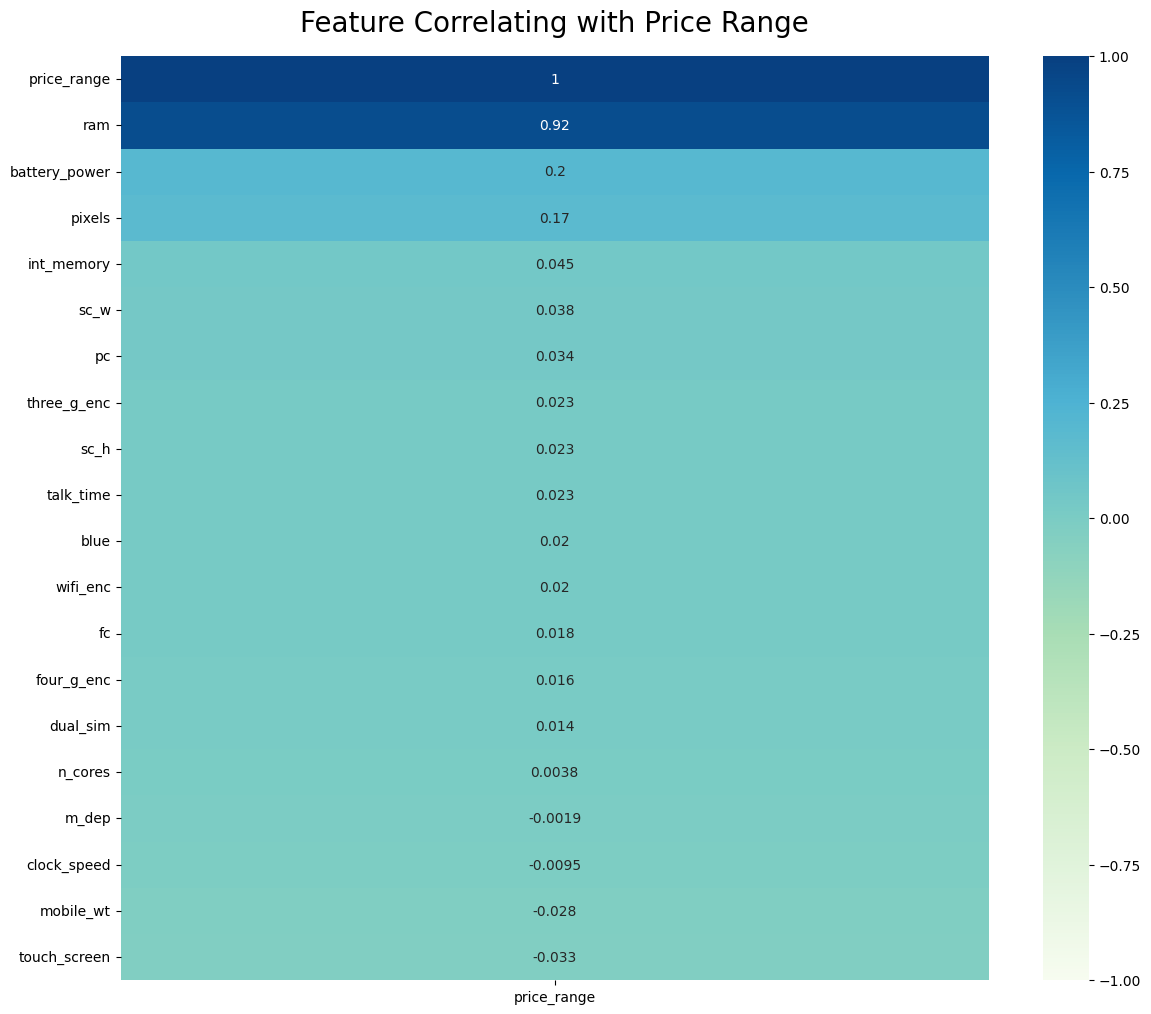

In [ ]:
data['pixels'] = data['px_height'] * data['px_width']
#data['sc'] = data['sc_h'] * data['sc_w']

data.drop(['px_height', 'px_width'], axis = 1, inplace = True)
#data.drop(['sc_h', 'sc_w'], axis = 1, inplace = True)
sns.heatmap(data.corr(), annot = True, cmap = "GnBu", linewidths= 0.2 )
fig = plt.gcf()
fig.set_size_inches(20,14)
plt.xticks(rotation = 60, size = 12)
plt.yticks(size = 20)
plt.title('Analysis of Correlations', size = 24)

plt.figure(figsize = (14, 12))
heatmap = sns.heatmap(data.corr()[['price_range']].sort_values (by = 'price_range',ascending = False),vmin = -1, vmax = 1, annot = True, cmap = 'GnBu')
heatmap.set_title('Feature Correlating with Price Range', fontdict = {'fontsize':20}, pad =18)

In [ ]:
print("px_height & px_weight can be used as a part of one feature named pixel.")

px_height & px_weight can be used as a part of one feature named pixel.


Dataset Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('price_range',axis=1)
Y = data['price_range']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1390, 19)
(597, 19)
(1390,)
(597,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train,Y_train)
pv = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a = accuracy_score(Y_test,pv)
print('Accuracy Score:',a)
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,pv))
print('\nClassification Report:\n',classification_report(Y_test,pv))

Accuracy Score: 0.6147403685092128

Confusion Matrix:
 [[115  42   3   0]
 [ 26  70  26  19]
 [  2  32  68  61]
 [  0   2  17 114]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76       160
           1       0.48      0.50      0.49       141
           2       0.60      0.42      0.49       163
           3       0.59      0.86      0.70       133

    accuracy                           0.61       597
   macro avg       0.62      0.62      0.61       597
weighted avg       0.62      0.61      0.61       597



Feature Scaling

MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MMSc = MinMaxScaler()

MMSc.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = MMSc.transform(X_train)

In [ ]:
print("feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print('\n-----------------------------------------------\n')
print("feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

feature minimum before scaling:
 battery_power    502.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
ram              258.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
touch_screen       0.0
four_g_enc         0.0
three_g_enc        0.0
wifi_enc           0.0
pixels             0.0
dtype: float64
feature maximum before scaling:
 battery_power       1998.0
blue                   1.0
clock_speed            3.0
dual_sim               1.0
fc                    19.0
int_memory            64.0
m_dep                  1.0
mobile_wt            200.0
n_cores                8.0
pc                    20.0
ram                 3998.0
sc_h                  19.0
sc_w                  18.0
talk_time             20.0
touch_screen           1.0
four_g_enc             1.0
three_g_enc            1.0
wifi_enc               

In [ ]:
X_test_scaled = MMSc.transform(X_test)


Model Training & Testing

KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_scaled,Y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
pv2 = knn.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a2 = accuracy_score(Y_test,pv2)
print('Accuracy Score:\n',a2)
print('\nConfusion Matrix:',confusion_matrix(Y_test,pv2))
print('\nClassification Report:\n',classification_report(Y_test,pv2))

Accuracy Score:
 0.5192629815745393

Confusion Matrix: [[104  47   9   0]
 [ 49  57  31   4]
 [ 13  49  56  45]
 [  0   5  35  93]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64       160
           1       0.36      0.40      0.38       141
           2       0.43      0.34      0.38       163
           3       0.65      0.70      0.68       133

    accuracy                           0.52       597
   macro avg       0.52      0.52      0.52       597
weighted avg       0.52      0.52      0.52       597



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
pv1 = lr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a1 = accuracy_score(Y_test,pv1)
print('Accuracy Score:',a1)
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,pv1))
print('\nClassification Report:\n',classification_report(Y_test,pv1))

Accuracy Score: 0.8659966499162479

Confusion Matrix:
 [[154   6   0   0]
 [  9 120  12   0]
 [  0  26 115  22]
 [  0   0   5 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       160
           1       0.79      0.85      0.82       141
           2       0.87      0.71      0.78       163
           3       0.85      0.96      0.90       133

    accuracy                           0.87       597
   macro avg       0.86      0.87      0.86       597
weighted avg       0.87      0.87      0.86       597



Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train_scaled,Y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
pv3 = lr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a3 = accuracy_score(Y_test,pv3)
print('Accuracy Score:',a3)
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,pv3))
print('\nClassification Report:\n',classification_report(Y_test,pv3))

Accuracy Score: 0.8659966499162479

Confusion Matrix:
 [[154   6   0   0]
 [  9 120  12   0]
 [  0  26 115  22]
 [  0   0   5 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       160
           1       0.79      0.85      0.82       141
           2       0.87      0.71      0.78       163
           3       0.85      0.96      0.90       133

    accuracy                           0.87       597
   macro avg       0.86      0.87      0.86       597
weighted avg       0.87      0.87      0.86       597



GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled,Y_train)

GaussianNB()

In [ ]:
pv4 = gnb.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
a4 = accuracy_score(Y_test,pv4)
print('Accuracy Score:',a4)
print('\nConfusion Matrix:\n',confusion_matrix(Y_test,pv4))
print('\nClassification Report:\n',classification_report(Y_test,pv4))

Accuracy Score: 0.7788944723618091

Confusion Matrix:
 [[143  17   0   0]
 [ 12 101  28   0]
 [  0  31 104  28]
 [  0   0  16 117]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.91       160
           1       0.68      0.72      0.70       141
           2       0.70      0.64      0.67       163
           3       0.81      0.88      0.84       133

    accuracy                           0.78       597
   macro avg       0.78      0.78      0.78       597
weighted avg       0.78      0.78      0.78       597



Model Selection/Comparison Analysis

Prediction Accuracy of the models

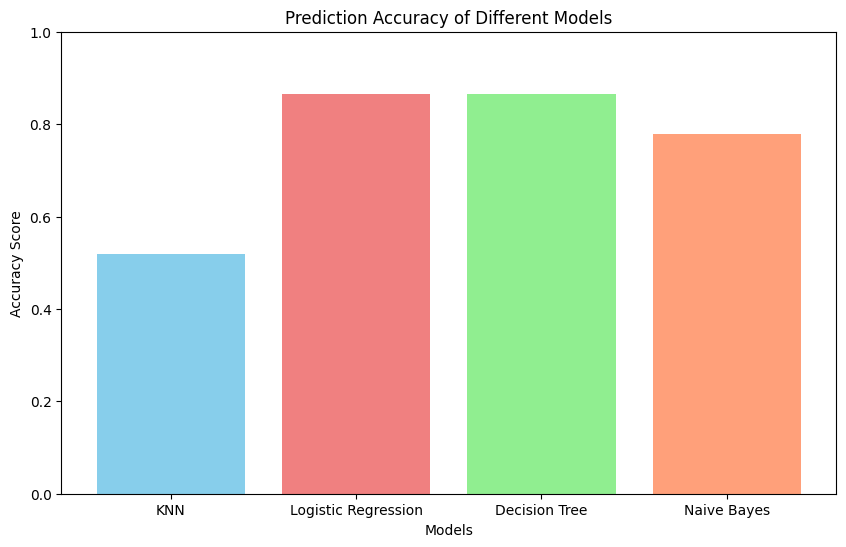

In [ ]:
import matplotlib.pyplot as plt

models = ['KNN', 'Logistic Regression', 'Decision Tree', 'Naive Bayes']
accuracy_scores = [a2, a1, a3, a4]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Prediction Accuracy of Different Models")
plt.ylim(0, 1)
plt.show()

Precision vs Recall Comparison

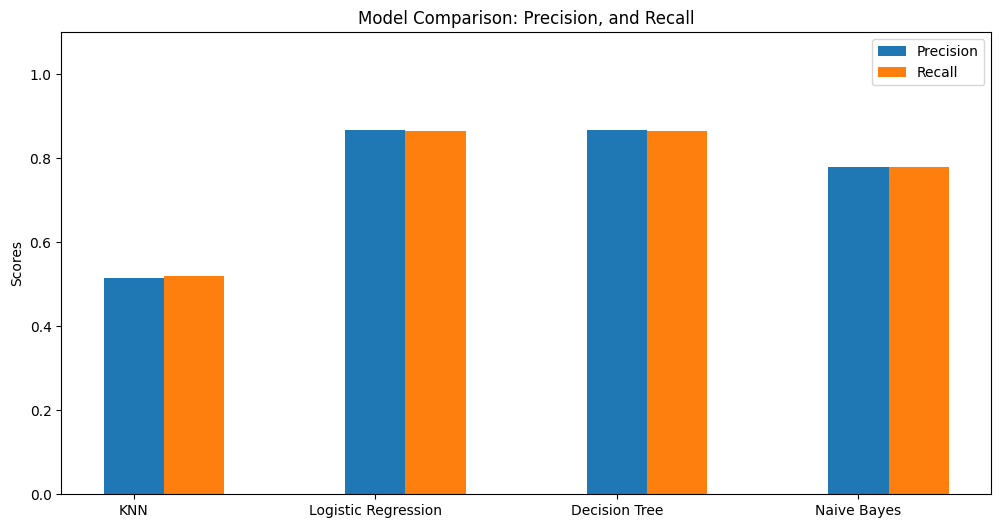

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
precision_knn = precision_score(Y_test, pv2, average='weighted')
recall_knn = recall_score(Y_test, pv2, average='weighted')

precision_lr = precision_score(Y_test, pv1, average='weighted')
recall_lr = recall_score(Y_test, pv1, average='weighted')

precision_dt = precision_score(Y_test, pv3, average='weighted')
recall_dt = recall_score(Y_test, pv3, average='weighted')

precision_nb = precision_score(Y_test, pv4, average='weighted')
recall_nb = recall_score(Y_test, pv4, average='weighted')


models = ['KNN', 'Logistic Regression', 'Decision Tree', 'Naive Bayes']
precision_scores = [precision_knn, precision_lr, precision_dt, precision_nb]
recall_scores = [recall_knn, recall_lr, recall_dt, recall_nb]


x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x, precision_scores, width, label='Precision')
rects2 = ax.bar(x + width, recall_scores, width, label='Recall')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Precision, and Recall')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0, 1.1)

plt.show()

Confusion Matrix

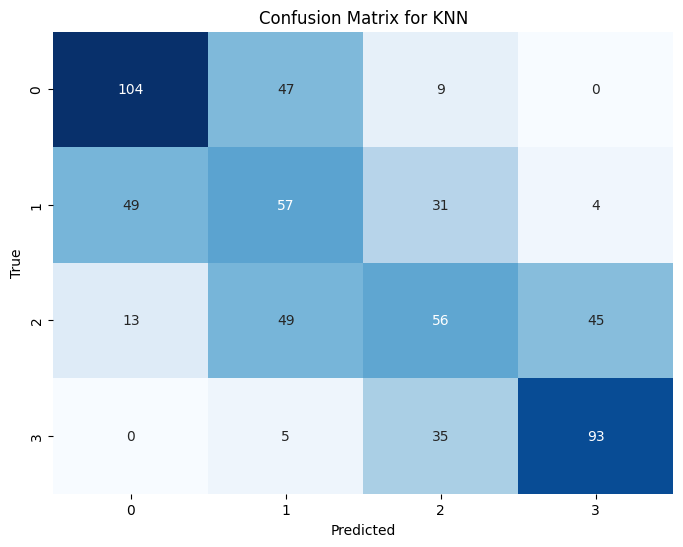

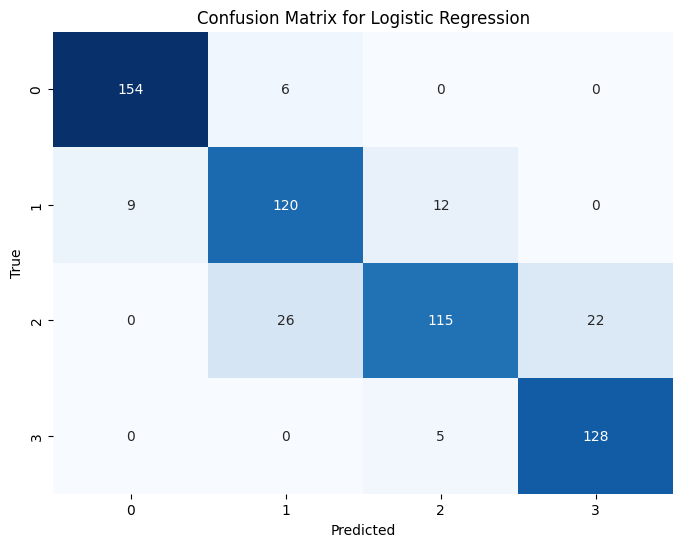

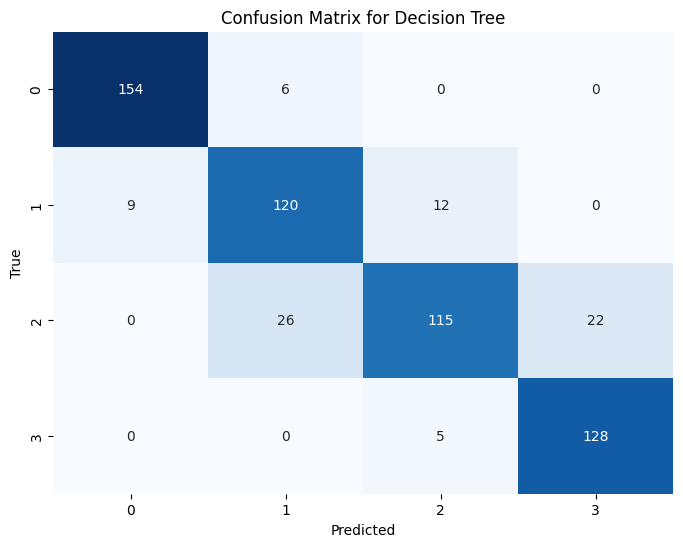

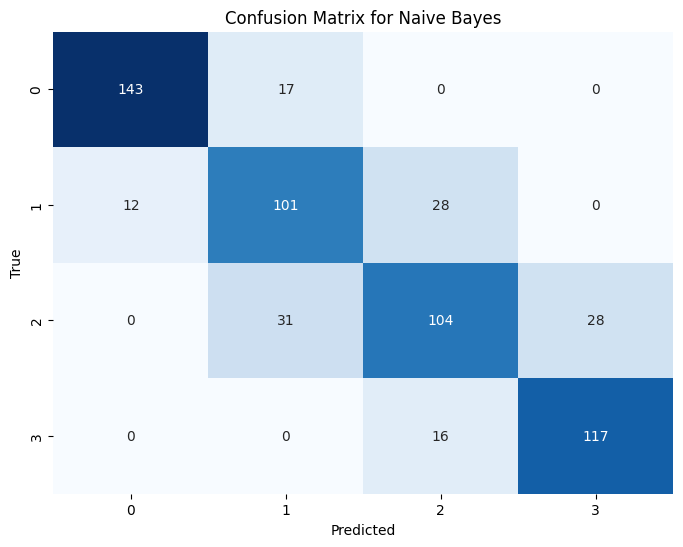

In [ ]:
cm_knn = confusion_matrix(Y_test, pv2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


cm_lr = confusion_matrix(Y_test, pv1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


cm_dt = confusion_matrix(Y_test, pv3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

cm_nb = confusion_matrix(Y_test, pv4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logistic Regression and Decision tree gave the best prediction results